<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/03_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%80%B4%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습-퀴즈] 딥러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN에 대해 코딩하여 모델 구축해 보겠습니다.
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 실습목차
+. 딥러닝 심층신경망(DNN) 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - DNN 딥러닝 모델

#  
# 1. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

##### <font color=blue> **[문제] 같은 폴더내에 있는 data_v1_save.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [ ]:
from google.colab import files
files.upload()

In [59]:
# 읽어 들일 파일명 : data_v1_save.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장
df = pd.read_csv('data_v1_save.csv')

## ③ 데이터 분석

In [60]:
# 17컬럼, 7027 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [10]:
df.tail()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,Female,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7023,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7024,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7025,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7026,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


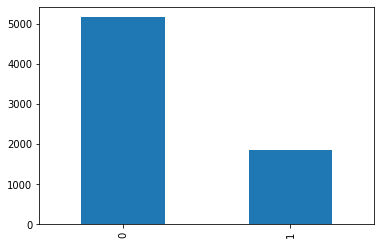

In [11]:
# Churn 레이블 불균형 
df['Churn'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 한다. 즉, Ojbect 타입을 모든 숫자형 변경 필요
+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [12]:
# Object 컬럼명 수집

cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], dtype=object)

##### <font color=blue> **[문제] Object 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [61]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장
df1 = pd.get_dummies(data = df, columns=cal_cols)

In [62]:
# 40컬럼, 7027 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7027 non-null   int64  
 1   MonthlyCharges                           7027 non-null   float64
 2   TotalCharges                             7027 non-null   float64
 3   Churn                                    7027 non-null   int64  
 4   gender_Female                            7027 non-null   uint8  
 5   gender_Male                              7027 non-null   uint8  
 6   Partner_No                               7027 non-null   uint8  
 7   Partner_Yes                              7027 non-null   uint8  
 8   Dependents_No                            7027 non-null   uint8  
 9   Dependents_Yes                           7027 non-null   uint8  
 10  MultipleLines_No                         7027 no

## ⑤ Train, Test  데이터셋 분할

In [15]:
from sklearn.model_selection import train_test_split

In [63]:
X = df1.drop('Churn', axis=1).values
y = df1['Churn'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [65]:
X_train.shape

(4918, 39)

In [66]:
y_train.shape

(4918,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [67]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7022,72,21.15,1419.40,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
7023,24,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7024,72,103.20,7362.90,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7025,11,29.60,346.45,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7026,4,74.40,306.60,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
X_train[:2]

array([[0.65277778, 0.56851021, 0.40877722, 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.27777778, 0.00498256, 0.04008671, 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1. 

## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

####  
### 라이브러리 임포트

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

####  
### 하이퍼파라미터 설정 : batch_size, epochs

In [70]:
batch_size = 16
epochs = 20

####  
### 모델 입력(features) 갯수 확인

In [71]:
X_train.shape

(4918, 39)

####  
### 모델 출력(label) 갯수 확인

In [72]:
y_train.shape

(4918,)

####  
### A. 이진분류 DNN모델 구성 

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

##### <font color=blue> **[문제] 요구사항대로 Sequential 모델을 만들어 보세요.** </font>

In [73]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(39,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

####  
### 모델 확인

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 160       
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [32]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(39,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

####  
### 과적합 방지 모델 확인

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 160       
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 이진 분류 모델

In [75]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

####  
### 모델 학습

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 10번
+ batch_size : 10번

In [76]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 10번
### batch_size 10번
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10
492/492 [==============================] - 2s 2ms/step - loss: 0.5236 - accuracy: 0.7387 - val_loss: 0.4599 - val_accuracy: 0.7658
Epoch 2/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.7708 - val_loss: 0.4405 - val_accuracy: 0.7800
Epoch 3/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.7826 - val_loss: 0.4339 - val_accuracy: 0.7838
Epoch 4/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.7895 - val_loss: 0.4294 - val_accuracy: 0.7933
Epoch 5/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.7938 - val_loss: 0.4267 - val_accuracy: 0.7933
Epoch 6/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.7971 - val_loss: 0.4259 - val_accuracy: 0.7975
Epoch 7/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.7963 - val_loss: 0.4248 - val_accuracy: 0.8018
Epoch 

####  
### B. 다중 분류 DNN 구성
+ 13개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [77]:
# 39개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(39,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

####  
### 모델 확인

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 200       
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                 24        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 2)                 10        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 다중 분류 모델

In [79]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

####  
### 모델 학습

In [80]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
308/308 [==============================] - 1s 3ms/step - loss: 0.5423 - accuracy: 0.7340 - val_loss: 0.4814 - val_accuracy: 0.7345
Epoch 2/20
308/308 [==============================] - 1s 2ms/step - loss: 0.5129 - accuracy: 0.7344 - val_loss: 0.4632 - val_accuracy: 0.7345
Epoch 3/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.7344 - val_loss: 0.4513 - val_accuracy: 0.7345
Epoch 4/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4901 - accuracy: 0.7344 - val_loss: 0.4492 - val_accuracy: 0.7345
Epoch 5/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.7344 - val_loss: 0.4449 - val_accuracy: 0.7345
Epoch 6/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4837 - accuracy: 0.7344 - val_loss: 0.4466 - val_accuracy: 0.7345
Epoch 7/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.7344 - val_loss: 0.4401 - val_accuracy: 0.7345
Epoch 

####  
### Callback : 조기종료, 모델 저장

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=5)

In [42]:
# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = ModelCheckpoint('best_model.h5', verbose=1, 
                              monitor='val_loss', mode='min', save_best_only=True)

####  
### 모델 학습

In [81]:
history = model.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
227/246 [==========================>...] - ETA: 0s - loss: 0.4627 - accuracy: 0.7361
Epoch 1: val_loss did not improve from 0.43201
246/246 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7344 - val_loss: 0.4404 - val_accuracy: 0.7345
Epoch 2/50
232/246 [===========================>..] - ETA: 0s - loss: 0.4686 - accuracy: 0.7328
Epoch 2: val_loss did not improve from 0.43201
246/246 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7344 - val_loss: 0.4333 - val_accuracy: 0.7345
Epoch 3/50
243/246 [============================>.] - ETA: 0s - loss: 0.4687 - accuracy: 0.7337
Epoch 3: val_loss did not improve from 0.43201
246/246 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7344 - val_loss: 0.4340 - val_accuracy: 0.7345
Epoch 4/50
238/246 [============================>.] - ETA: 0s - loss: 0.4647 - accuracy: 0.7395
Epoch 4: val_loss did not improve from 0.43201
246/246 [==========================

####  
## ⑧ 모델 성능 평가

In [44]:
losses = pd.DataFrame(model.history.history)

In [45]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.472643,0.768605,0.437521,0.795638
1,0.472719,0.760268,0.434191,0.796586
2,0.473267,0.769825,0.434259,0.792319
3,0.468788,0.764742,0.433287,0.797534
4,0.463253,0.769418,0.432012,0.798009


### 성능 시각화

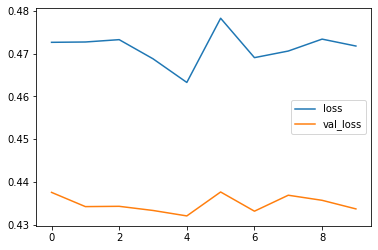

In [46]:
losses[['loss','val_loss']].plot()

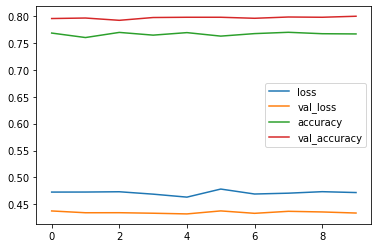

In [47]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

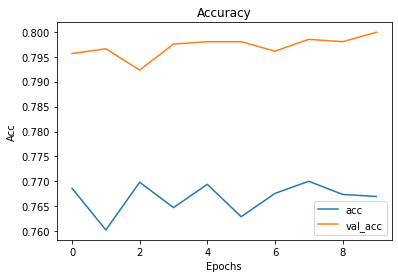

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

### 성능 평가

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [50]:
pred = model.predict(X_test)

In [51]:
pred.shape

(2109, 2)

In [52]:
y_pred = np.argmax(pred, axis=1)

In [53]:
# 정확도 80%
accuracy_score(y_test, y_pred)

0.7999051683262209

In [54]:
# 재현율 성능이 좋지 않다
recall_score(y_test, y_pred)

0.49107142857142855

##### <font color=blue>**[문제] accuracy, recall, precision 성능 한번에 출력해보세요 </font>

In [58]:
# accuracy, recall, precision 성능 한번에 보기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.67      0.49      0.57       560

    accuracy                           0.80      2109
   macro avg       0.75      0.70      0.72      2109
weighted avg       0.79      0.80      0.79      2109



In [ ]:
'''
# 재현율을 높이려면?
1. 하이퍼파라미터 바꾸면서 성능 향상이 되는지 확인
2. 데이터 수를 늘리거나 줄이거나, Feature를 늘리거나 줄이거나
  - oversampling, undersampling
    (SMOTE)
'''